In [1]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
import seaborn                 as sns     # Otras funciones para graficar

from sklearn.neighbors             import KNeighborsClassifier # Modelo de K Vecinos Cercanos
from sklearn.metrics               import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics               import confusion_matrix   # Función para calcular una matriz de confusión
from scipy.spatial.distance        import cdist              # Función para calcular la distancia euclidiana

sns.set()
import warnings
warnings.filterwarnings('ignore')
# print( LDA.__doc__ )

# Referencias::
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [2]:
# Definimos nuestra función para calcular la distancia minima de un punto y una recta
def DistanciaEuclidiana( P1, P2 ):
    # Esto es un comentario
    # Lo siguiente es la cadena de documentación
    """
DistanciaEucllidiana
    
    Regresa la distancia euclidiana de dos puntos en R2
    Donde P1 = (x1, y1) y P2 = (x2, y2)
    
    Parámetros
    --------------------
    P1 - tipo flotante, lista/tupla con dimensión (2,) (obligatorio)
        Coordenadas de P1
    P2 - tipo flotante, lista/tupla con dimensión (2,) (obligatorio)
        Coordenadas de P2
        
    Resultado
    --------------------
    distancia - array tipo flotante de dimensión (1,)
    
    Ejemplo
    --------------------
    >> import numpy as np
    >> DistanciaEuclidiana( (0,0), (1,1) )
    [1] 1.4142
    """
    # Manejo de Excepciones
    if not type(P1) in (tuple, list):
        raise Exception("P1 no es de tipo Tupla/Lista")
    if not type(P2) in (tuple, list):
        raise Exception("P2 no es de tipo Tupla/Lista")
    if len(P1) < 2:
        raise Exception("P1 debe tener al menos 2 elementos")
    if len(P2) < 2:
        raise Exception("P2 debe tener al menos 2 elementos")
    if len(P1) != len(P2):
        raise Exception("P1 y P2 tienen diferente longitud")
    # Codigo de la función
    x1, y1    = P1
    x2, y2    = P2
    distancia = np.sqrt( (x2-x1)**2 + (y2-y1)**2 )
    return distancia

# Mostramos la documentación de la función
print( DistanciaEuclidiana.__doc__ )


DistanciaEucllidiana
    
    Regresa la distancia euclidiana de dos puntos en R2
    Donde P1 = (x1, y1) y P2 = (x2, y2)
    
    Parámetros
    --------------------
    P1 - tipo flotante, lista/tupla con dimensión (2,) (obligatorio)
        Coordenadas de P1
    P2 - tipo flotante, lista/tupla con dimensión (2,) (obligatorio)
        Coordenadas de P2
        
    Resultado
    --------------------
    distancia - array tipo flotante de dimensión (1,)
    
    Ejemplo
    --------------------
    >> import numpy as np
    >> DistanciaEuclidiana( (0,0), (1,1) )
    [1] 1.4142
    


In [3]:
DistanciaEuclidiana( [1,1], (2,3) )

2.23606797749979

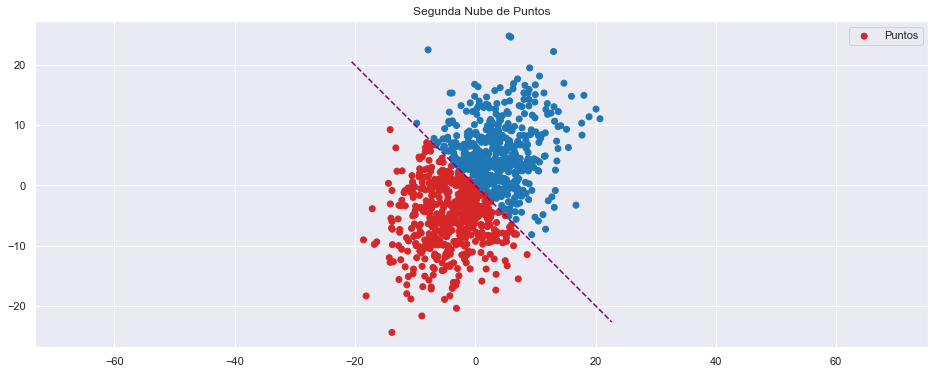

In [4]:
# Leemos datos de ejemplo
datos_2 = pd.read_csv("datos_2.csv")   # Datos con dos clases

# Creamos una función que realice nuestra linea recta
def abline(b0, b1, color = "purple"):
    """Grafica una linea recta con ordenada al origen b0 y pendiente b1"""
    x_vals = np.array( plt.gca().get_xlim() )
    y_vals = b0 + b1 * x_vals
    plt.plot(x_vals, y_vals, linestyle='--', color=color)
    plt.legend()

# Graficamos nuestros puntos
fig, axs = plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
axs.set_title("Segunda Nube de Puntos")
axs.scatter( x=datos_2["X"], y=datos_2["Y"], c=datos_2["Z"], label="Puntos")
abline(b0 = 0, b1 = -1)
axs.axis('equal')
plt.show()

**Recordemos** que la recta que separa a este conjunto de puntos es la menos identidad. Es decir

$$\beta_0 = 0 \qquad \qquad \beta_1 = -1$$

In [5]:
# Matriz de Distancias de Ejemmplo
PuntosX           = [ 1, 5, 6, 8, 9, 2 ]
PuntosY           = [ 3, 8, 2, 9, 4, 5 ]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )
print( matriz_distancias )

[[0.         6.40312424 5.09901951 9.21954446 8.06225775 2.23606798]
 [6.40312424 0.         6.08276253 3.16227766 5.65685425 4.24264069]
 [5.09901951 6.08276253 0.         7.28010989 3.60555128 5.        ]
 [9.21954446 3.16227766 7.28010989 0.         5.09901951 7.21110255]
 [8.06225775 5.65685425 3.60555128 5.09901951 0.         7.07106781]
 [2.23606798 4.24264069 5.         7.21110255 7.07106781 0.        ]]


In [6]:
def KMasCercanos( k, arreglo, regresar_indices = True ):
    indices = np.argsort(arreglo)[1:(k+1)]
    if regresar_indices:
        return indices
    else:
        return arreglo[indices]

print( KMasCercanos( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = True ) )
print("")
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = True ) )
print("")
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = True ) )

[2.23606798 5.09901951 6.40312424]
[5 2 1]

[3.60555128 5.         5.09901951]
[4 5 0]

[3.60555128 5.09901951 5.65685425]
[2 3 1]


In [7]:
# Matriz de Distancias
PuntosX           = datos_2["X"]
PuntosY           = datos_2["Y"]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )

In [8]:
# Proceso de clasificacion
lista_clasificaciones = list()
for indice in np.arange(datos_2.shape[0]): #np.arange(100)
    indices_cercanos  = KMasCercanos( k = 3, arreglo =  matriz_distancias[indice,:], regresar_indices = True )
    k_clasificaciones = np.array( datos_2["Z"] )[ indices_cercanos ]
    clasificacion     = max( set(k_clasificaciones), key=list(k_clasificaciones).count)
    lista_clasificaciones.append( clasificacion )
lista_clasificaciones = np.array( lista_clasificaciones )
#lista_clasificaciones

In [9]:
# Matriz de Confusion
confusion_matrix(y_true = np.array( datos_2["Z"] ), y_pred = lista_clasificaciones )

array([[478,   3],
       [  6, 513]], dtype=int64)

In [10]:
# Precisión del modelo
accuracy_score(y_true = np.array( datos_2["Z"] ), y_pred = lista_clasificaciones )

0.991

# Modelo KNN

#1F77B4 es azul
#D62728 es rojo

In [11]:
matriz_diseño = datos_2.values[:,0:2]
y_reales      = datos_2.values[:,2]
y_reales_mod  = np.array([ 1 if x == '#1F77B4' else 2 for x in y_reales ])
knn = KNeighborsClassifier(n_neighbors=3).fit( matriz_diseño, y_reales_mod )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
print( "Precisión :", knn.score( matriz_diseño, y_reales_mod ) )

Precisión : 0.996
